Data
     HS  Toán  Lý  Tình trạng
0    1     5   6           0
1    2     6   7           1
2    3     7   4           0
3    4     4   8           0
4    5     8   9           1
5    6     9   3           0
6    7    10   6           1
7    8     8   8           1
8    9     9   9           1
9   10     5   9           1
10  11     8   9           1
11  12     4  10           1
12  13     9   8           1
Tổng điểm đỗ nhỏ nhất:  13
Tổng điểm trượt lớn nhất:  12
Điểm quyết định:  6.25
Nhập điểm toán: 7
Nhập điểm lý: 8


<ipython-input-4-9124cb450ca0>:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(margin_do1, margin_do2, 'go-', label='Margin đỗ', color = 'orange')
<ipython-input-4-9124cb450ca0>:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(margin_truot1, margin_truot2, 'go-', label='Margin Trượt', color = 'black')


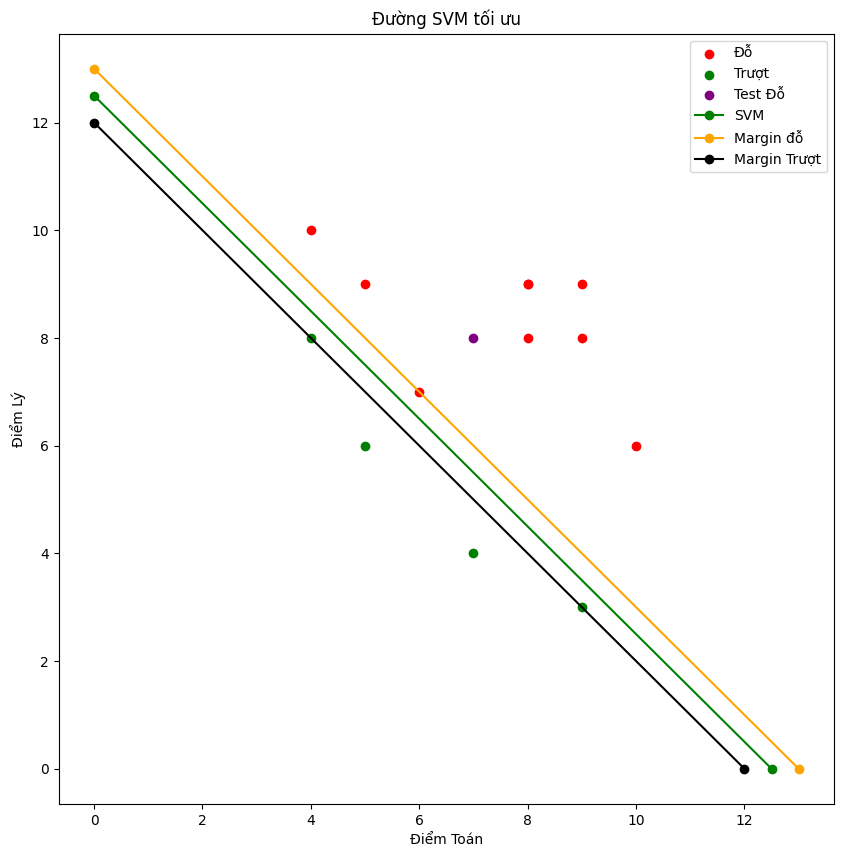

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.DataFrame({'HS':[1,2,3,4,5,6,7,8,9,10,11,12, 13], 'Toán':[5,6,7,4,8,9,10,8,9,5,8,4,9],
                     'Lý':[6,7,4,8,9,3,6,8,9,9,9,10,8], 'Tình trạng':[0, 1,0,0,1,0,1,1,1,1,1,1,1]})
print('Data\n', data)

# Tính tổng nhỏ nhất của đỗ
sum_min_do = min(data['Toán'][data['Tình trạng'] == 1] + data['Lý'][data['Tình trạng'] == 1])
print('Tổng điểm đỗ nhỏ nhất: ', sum_min_do)
# Tính tổng lớn nhất của trượt
sum_max_truot = max(data['Toán'][data['Tình trạng'] == 0] + data['Lý'][data['Tình trạng'] == 0])
print('Tổng điểm trượt lớn nhất: ', sum_max_truot)

# Điểm quyết định
diem_quyet_dinh = (sum_min_do + sum_max_truot)/4
print('Điểm quyết định: ', diem_quyet_dinh)
# Tọa đồ đường SVM
x1 = [diem_quyet_dinh*2, 0]
x2 = [0, diem_quyet_dinh*2]
# Đường biên margin
margin_do1 = [sum_min_do, 0]
margin_do2 = [0, sum_min_do]
margin_truot1 = [sum_max_truot, 0]
margin_truot2 = [0, sum_max_truot]

# Test
diem_toan = float(input('Nhập điểm toán: '))
diem_ly = float(input('Nhập điểm lý: '))
mean_test = (diem_toan + diem_ly)/2

if mean_test <= diem_quyet_dinh:
  kq = 'Trượt'
else:
  kq = 'Đỗ'

plt.figure(figsize=(10,10))
plt.title('Đường SVM tối ưu')

plt.scatter(data['Toán'][data['Tình trạng'] == 1], data['Lý'][data['Tình trạng'] == 1], label='Đỗ', color = 'red')
plt.scatter(data['Toán'][data['Tình trạng'] == 0], data['Lý'][data['Tình trạng'] == 0], label='Trượt', color = 'green')
plt.scatter(diem_toan, diem_ly, color = 'purple', label='Test {}'.format(kq), marker = 'o')
plt.plot(x1,x2, 'go-', label='SVM')
plt.plot(margin_do1, margin_do2, 'go-', label='Margin đỗ', color = 'orange')
plt.plot(margin_truot1, margin_truot2, 'go-', label='Margin Trượt', color = 'black')

plt.xlabel('Điểm Toán')
plt.ylabel('Điểm Lý')
plt.legend()


data
     Tầng  Km  Gia
0      4   6  2.0
1      5   7  1.2
2      6   4  2.2
3      3   4  1.3
4      6   7  2.0
5      7   4  1.0
6      3   6  1.0
7      5   3  1.2
8      6   7  1.5
9      4   7  1.6
10     6   9  3.0
11     5   5  5.0
bo:  -1.933949188167526
b1, b2:  0.3846739792809263 0.3351732101616628
Nhap so tang: 6
Nhap so km: 7
Gia nha cua:  {'Tầng': 6, 'Km': 7.0} 2.720307158649671


<ipython-input-37-204514745173>:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.
  plt.plot((x1[0],x2[0]), (y_pre1, y_pre2),'go-', label = 'Linear', color='green')


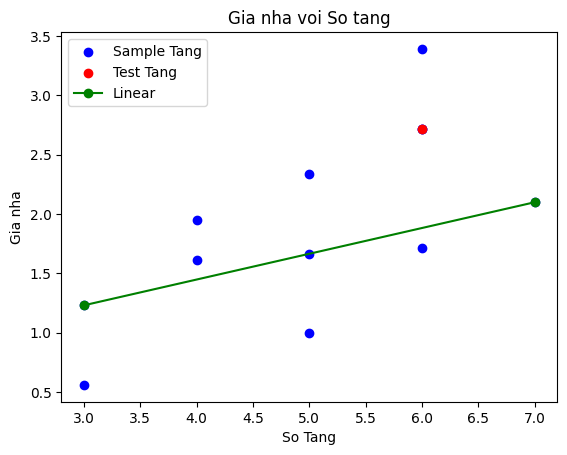

<ipython-input-37-204514745173>:52: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.
  plt.plot((x1[1],x2[1]), (y_pre1, y_pre2),'go-', label = 'Linear', color='green')


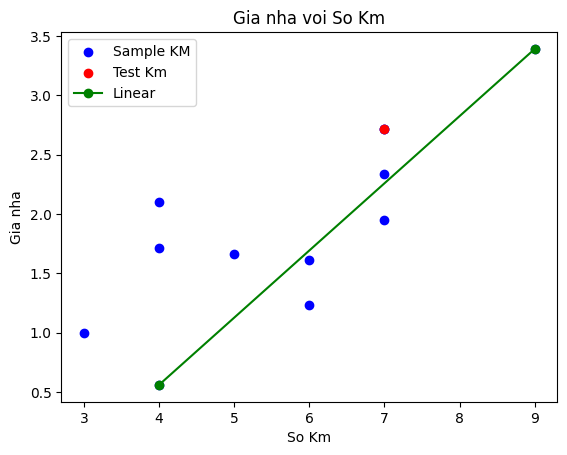

In [ ]:
data = pd.DataFrame({'Tầng':[4,5,6,3,6,7,3,5,6,4,6,5], 'Km':[6,7,4,4,7,4,6,3,7,7,9,5], 'Gia':[2,1.2,2.2,1.3,2,1,1,1.2,1.5,1.6,3,5]})
print('data\n', data)

def find_b (name_feature, name_feature_out, data):
  s1 = sum(data[name_feature] * data[name_feature_out])
  s2 = sum(data[name_feature]) * sum(data[name_feature_out])
  s3 = sum(data[name_feature]**2)
  s4 = sum(data[name_feature])**2
  b = (s1-s2) / (s3-s4)
  return b
b1 = find_b('Tầng', 'Gia', data)
b2 = find_b('Km', 'Gia', data)
x1_mean = sum(data['Tầng'])/len(data)
x2_mean = sum(data['Km'])/len(data)
y_mean = sum(data['Gia'])/len(data)
bo = y_mean - b1*x1_mean - b2*x2_mean
print('bo: ', bo)
print('b1, b2: ', b1, b2)
def predict (bo, b1, b2,data, data_test):
  y_pre = bo + b1*data_test['Tầng'] + b2*data_test['Km']
  y_sample = bo + b1*data['Tầng'] + b2*data['Km']
  return y_pre, y_sample

data_test = {}
tang = int(input('Nhap so tang: '))
km = float(input('Nhap so km: '))
data_test['Tầng'] = tang
data_test['Km'] = km
y_pre, y_sample = predict(bo,b1,b2,data, data_test)

print('Gia nha cua: ', data_test, y_pre)
x1 = [3,6]
x2 = [7,4]
y_pre1 = bo + b1*x1[0] + b2*x1[1]
y_pre2 = bo + b1*x2[0] + b2*x2[1]
plt.title('Gia nha voi So tang')
plt.scatter(data['Tầng'], y_sample, label = 'Sample Tang', color = 'blue')
plt.scatter(data_test['Tầng'], y_pre, label='Test Tang', color = 'red')
plt.plot((x1[0],x2[0]), (y_pre1, y_pre2),'go-', label = 'Linear', color='green')
plt.xlabel('So Tang')
plt.ylabel('Gia nha')
plt.legend()
plt.show()

x1 = [3,4]
x2 = [6,9]
y_pre1 = bo + b1*x1[0] + b2*x1[1]
y_pre2 = bo + b1*x2[0] + b2*x2[1]
plt.title('Gia nha voi So Km')
plt.scatter(data['Km'], y_sample, label = 'Sample KM', color = 'blue')
plt.scatter(data_test['Km'], y_pre, label='Test Km', color = 'red')
plt.plot((x1[1],x2[1]), (y_pre1, y_pre2),'go-', label = 'Linear', color='green')
plt.xlabel('So Km')
plt.ylabel('Gia nha')
plt.legend()
plt.show()